In [66]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

import seaborn as sns

In [5]:
# uses data_cleaned_final
df = pd.read_csv(r'C:\Users\Sahan\Documents\ds-project1\Data\data_cleaned_final.csv', encoding='latin1', low_memory=False)

In [6]:
df

,Date,Location,Country,Injury_Severity,Damage_Type,Aircraft_Category,Make,Engines,Engine_Type,Fatal_Injuries,Serious_Injuries,Minor_Injuries,Uninjured,Weather,Total_Passengers,Year,Month,Model
0,1990-01-01,"ELKHART, IN",United States,Non-Fatal,Substantial,Airplane,cessna,1.0,Reciprocating,0.0,0.0,0.0,2.0,VMC,2.0,1990,1,150F
1,1990-01-02,"MILLIS, MA",United States,Non-Fatal,Substantial,Airplane,cessna,1.0,Reciprocating,0.0,0.0,1.0,0.0,VMC,1.0,1990,1,150
2,1990-01-03,"APPLE VALLEY, CA",United States,Non-Fatal,Minor,Airplane,cessna,1.0,Reciprocating,0.0,0.0,0.0,5.0,VMC,5.0,1990,1,172M
3,1990-01-03,"SLIPPERY ROCK, PA",United States,Non-Fatal,Substantial,Airplane,aeronca,1.0,Reciprocating,0.0,0.0,0.0,1.0,VMC,1.0,1990,1,11CC
4,1990-01-03,"APPLE VALLEY, CA",United States,Non-Fatal,Substantial,Airplane,mooney,1.0,Reciprocating,0.0,0.0,0.0,5.0,VMC,5.0,1990,1,MARK 22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37456,2022-12-12,"Knoxville, TN",United States,Non-Fatal,Substantial,Airplane,cessna,1.0,NaN,0.0,0.0,0.0,1.0,VMC,1.0,2022,12,172
37457,2022-12-12,"Redding, CA",United States,Minor,Substantial,Airplane,airbus,1.0,NaN,0.0,1.0,0.0,0.0,NaN,1.0,2022,12,EC 130 T2
37458,2022-12-13,"Lewistown, MT",United States,Non-Fatal,Substantial,Airplane,piper,2.0,NaN,0.0,0.0,0.0,1.0,NaN,1.0,2022,12,PA42
37459,2022-12-14,"San Juan, PR",United States,Non-Fatal,Substantial,Airplane,cirrus,1.0,NaN,0.0,0.0,0.0,1.0,VMC,1.0,2022,12,SR22


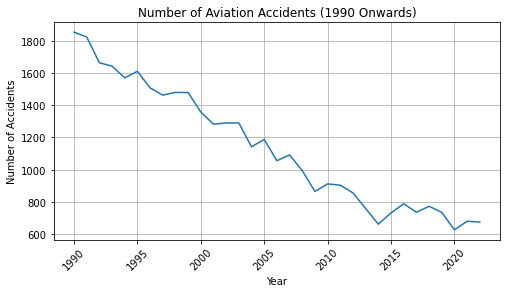

In [7]:
df = df[df['Year'] >= 1990]

accidents_by_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
plt.plot(accidents_by_year.index, accidents_by_year.values, linestyle='-')
plt.title('Number of Aviation Accidents (1990 Onwards)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37461 entries, 0 to 37460
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               37461 non-null  object 
 1   Location           37459 non-null  object 
 2   Country            37461 non-null  object 
 3   Injury_Severity    37461 non-null  object 
 4   Damage_Type        37461 non-null  object 
 5   Aircraft_Category  37461 non-null  object 
 6   Make               37461 non-null  object 
 7   Engines            37461 non-null  float64
 8   Engine_Type        36420 non-null  object 
 9   Fatal_Injuries     37461 non-null  float64
 10  Serious_Injuries   37461 non-null  float64
 11  Minor_Injuries     37461 non-null  float64
 12  Uninjured          37461 non-null  float64
 13  Weather            37215 non-null  object 
 14  Total_Passengers   37461 non-null  float64
 15  Year               37461 non-null  int64  
 16  Month              374

In [9]:
make_counts = df['Make'].value_counts()

In [35]:
pd.set_option('display.max_rows', df['Make'].nunique())

In [36]:
df['Make'] = df['Make'].str.lower()
df.loc[df['Make'].str.contains('cessna', na=False), 'Make'] = 'Cessna'
make_counts = df['Make'].value_counts()

In [37]:
df.loc[df['Make'].str.contains('beechcraft', na=False), 'Make'] = 'Beechcraft'

In [38]:
df.loc[df['Make'].str.contains('boeing', na=False), 'Make'] = 'Boeing'

In [39]:
df.loc[df['Make'].str.contains('bellanca', na=False), 'Make'] = 'Bellanca'

In [40]:
df['Make'].value_counts()

Cessna                            16719
piper                              9225
Beechcraft                         3314
grumman                             952
mooney                              912
Boeing                              735
air tractor                         529
aeronca                             429
maule                               422
hughes                              386
cirrus                              351
champion                            336
stinson                             301
luscombe                            294
mcdonnell douglas                   255
north american                      254
rockwell                            252
taylorcraft                         249
aero commander                      247
de havilland                        221
schweizer                           204
air tractor inc                     202
ayres                               147
aerospatiale                        146
aviat                               136


In [41]:
df['Damage_Type'].isna().sum()

449

In [11]:
sizewize = [
    df['Total_Passengers'] < 100,
    (df['Total_Passengers'] >= 100) & (df['Total_Passengers'] <= 249),
    df['Total_Passengers'] >= 250
]

In [12]:
choices = ['Small', 'Medium', 'Large']

In [13]:
df['plane_size'] = np.select(sizewize, choices, default='unknown')

In [14]:
df['plane_size'].value_counts()

Small     37251
Medium      167
Large        43
Name: plane_size, dtype: int64

In [15]:
df['State'] = df['Location'].str.split(',').str[1].str.strip()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37910 entries, 0 to 37909
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         37910 non-null  int64  
 1   Date               37910 non-null  object 
 2   Location           37908 non-null  object 
 3   Country            37910 non-null  object 
 4   Injury_Severity    37910 non-null  object 
 5   Damage_Type        37461 non-null  object 
 6   Aircraft_Category  37910 non-null  object 
 7   Make               37910 non-null  object 
 8   Model              37910 non-null  object 
 9   Engines            37910 non-null  float64
 10  Engine_Type        36837 non-null  object 
 11  Fatal_Injuries     37910 non-null  float64
 12  Serious_Injuries   37910 non-null  float64
 13  Minor_Injuries     37910 non-null  float64
 14  Uninjured          37910 non-null  float64
 15  Weather            37649 non-null  object 
 16  Total_Passengers   379

In [48]:
Unnamed, type, Amateur.Built , Publication.Date , Registration.Number, Country                

NameError: name 'Unnamed' is not defined

In [49]:
df = df.drop(columns=['Type', 'Amateur.Built', 'Publication.Date', 'Registration.Number'])

KeyError: "['Type' 'Amateur.Built' 'Publication.Date' 'Registration.Number'] not found in axis"

In [50]:
df

,Unnamed: 0,Date,Location,Country,Injury_Severity,Damage_Type,Aircraft_Category,Make,Model,Engines,...,Fatal_Injuries,Serious_Injuries,Minor_Injuries,Uninjured,Weather,Total_Passengers,Year,Month,plane_size,State
0,21550,1990-01-01,"ELKHART, IN",United States,Non-Fatal,Substantial,Airplane,Cessna,150F,1.0,...,0.0,0.0,0.0,2.0,VMC,2.0,1990,1,Small,IN
1,21552,1990-01-02,"MILLIS, MA",United States,Non-Fatal,Substantial,Airplane,Cessna,150,1.0,...,0.0,0.0,1.0,0.0,VMC,1.0,1990,1,Small,MA
2,21553,1990-01-03,"APPLE VALLEY, CA",United States,Non-Fatal,Minor,Airplane,Cessna,172M,1.0,...,0.0,0.0,0.0,5.0,VMC,5.0,1990,1,Small,CA
3,21554,1990-01-03,"SLIPPERY ROCK, PA",United States,Non-Fatal,Substantial,Airplane,aeronca,11CC,1.0,...,0.0,0.0,0.0,1.0,VMC,1.0,1990,1,Small,PA
4,21555,1990-01-03,"APPLE VALLEY, CA",United States,Non-Fatal,Substantial,Airplane,mooney,MARK 22,1.0,...,0.0,0.0,0.0,5.0,VMC,5.0,1990,1,Small,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37905,70782,2022-12-12,"Knoxville, TN",United States,Non-Fatal,Substantial,Airplane,Cessna,172,1.0,...,0.0,0.0,0.0,1.0,VMC,1.0,2022,12,Small,TN
37906,70783,2022-12-12,"Redding, CA",United States,Minor,Substantial,Airplane,airbus,EC 130 T2,1.0,...,0.0,1.0,0.0,0.0,NaN,1.0,2022,12,Small,CA
37907,70784,2022-12-13,"Lewistown, MT",United States,Non-Fatal,Substantial,Airplane,piper,PA42,2.0,...,0.0,0.0,0.0,1.0,NaN,1.0,2022,12,Small,MT
37908,70785,2022-12-14,"San Juan, PR",United States,Non-Fatal,Substantial,Airplane,cirrus,SR22,1.0,...,0.0,0.0,0.0,1.0,VMC,1.0,2022,12,Small,PR


In [51]:
df['Model'].value_counts()

152          1257
172          1107
172N          780
PA-28-140     565
172M          539
             ... 
F6F-5           1
C208B           1
B-58            1
C90 - A         1
737-8           1
Name: Model, Length: 2899, dtype: int64

In [16]:
pd.set_option('display.max_rows', df['Model'].nunique())

In [17]:
df['Model'].value_counts()

152                     1252
172                     1102
172N                     775
PA 28 140                597
172M                     539
PA 18 150                480
172P                     455
150                      439
180                      439
182                      404
PA 28 180                403
PA 18                    390
PA 28 161                367
172S                     352
150M                     343
PA 28 181                340
A36                      302
G 164B                   284
140                      282
150L                     272
170B                     265
PA 12                    262
G 164A                   254
PA 24 250                230
182P                     227
PA28                     222
PA 28R 200               219
SR22                     217
PA 32 300                215
M20J                     196
A185F                    190
PA 38 112                187
177                      186
182Q                     183
PA 22 150     

In [18]:
df['Fatal_Index'] = df['Fatal_Injuries'] / df['Total_Passengers']
df['Serious_Index'] = df['Serious_Injuries'] / df['Total_Passengers']
df['Minor_Index'] = df['Minor_Injuries'] / df['Total_Passengers']
df['Uninjured_Index']= df['Uninjured'] / df['Total_Passengers']

In [19]:
df

,Date,Location,Country,Injury_Severity,Damage_Type,Aircraft_Category,Make,Engines,Engine_Type,Fatal_Injuries,...,Total_Passengers,Year,Month,Model,plane_size,State,Fatal_Index,Serious_Index,Minor_Index,Uninjured_Index
0,1990-01-01,"ELKHART, IN",United States,Non-Fatal,Substantial,Airplane,cessna,1.0,Reciprocating,0.0,...,2.0,1990,1,150F,Small,IN,0.0,0.0,0.0,1.0
1,1990-01-02,"MILLIS, MA",United States,Non-Fatal,Substantial,Airplane,cessna,1.0,Reciprocating,0.0,...,1.0,1990,1,150,Small,MA,0.0,0.0,1.0,0.0
2,1990-01-03,"APPLE VALLEY, CA",United States,Non-Fatal,Minor,Airplane,cessna,1.0,Reciprocating,0.0,...,5.0,1990,1,172M,Small,CA,0.0,0.0,0.0,1.0
3,1990-01-03,"SLIPPERY ROCK, PA",United States,Non-Fatal,Substantial,Airplane,aeronca,1.0,Reciprocating,0.0,...,1.0,1990,1,11CC,Small,PA,0.0,0.0,0.0,1.0
4,1990-01-03,"APPLE VALLEY, CA",United States,Non-Fatal,Substantial,Airplane,mooney,1.0,Reciprocating,0.0,...,5.0,1990,1,MARK 22,Small,CA,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37456,2022-12-12,"Knoxville, TN",United States,Non-Fatal,Substantial,Airplane,cessna,1.0,NaN,0.0,...,1.0,2022,12,172,Small,TN,0.0,0.0,0.0,1.0
37457,2022-12-12,"Redding, CA",United States,Minor,Substantial,Airplane,airbus,1.0,NaN,0.0,...,1.0,2022,12,EC 130 T2,Small,CA,0.0,1.0,0.0,0.0
37458,2022-12-13,"Lewistown, MT",United States,Non-Fatal,Substantial,Airplane,piper,2.0,NaN,0.0,...,1.0,2022,12,PA42,Small,MT,0.0,0.0,0.0,1.0
37459,2022-12-14,"San Juan, PR",United States,Non-Fatal,Substantial,Airplane,cirrus,1.0,NaN,0.0,...,1.0,2022,12,SR22,Small,PR,0.0,0.0,0.0,1.0


In [20]:
df['Minor_Injuries'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
37456    False
37457    False
37458    False
37459    False
37460    False
Name: Minor_Injuries, Length: 37461, dtype: bool

In [21]:
missing_fatal = df[df['Fatal_Injuries'].isna()]

In [22]:
df['Minor_Injuries'].isna().sum()

0

In [23]:
df['Minor_Injuries'].isna().sum()

0

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37461 entries, 0 to 37460
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               37461 non-null  object 
 1   Location           37459 non-null  object 
 2   Country            37461 non-null  object 
 3   Injury_Severity    37461 non-null  object 
 4   Damage_Type        37461 non-null  object 
 5   Aircraft_Category  37461 non-null  object 
 6   Make               37461 non-null  object 
 7   Engines            37461 non-null  float64
 8   Engine_Type        36420 non-null  object 
 9   Fatal_Injuries     37461 non-null  float64
 10  Serious_Injuries   37461 non-null  float64
 11  Minor_Injuries     37461 non-null  float64
 12  Uninjured          37461 non-null  float64
 13  Weather            37215 non-null  object 
 14  Total_Passengers   37461 non-null  float64
 15  Year               37461 non-null  int64  
 16  Month              374

In [33]:
df = df[df['Total_Passengers'] != 0]

In [34]:
df

,Date,Location,Country,Injury_Severity,Damage_Type,Aircraft_Category,Make,Engines,Engine_Type,Fatal_Injuries,...,Total_Passengers,Year,Month,Model,plane_size,State,Fatal_Index,Serious_Index,Minor_Index,Uninjured_Index
0,1990-01-01,"ELKHART, IN",United States,Non-Fatal,Substantial,Airplane,cessna,1.0,Reciprocating,0.0,...,2.0,1990,1,150F,Small,IN,0.0,0.0,0.0,1.0
1,1990-01-02,"MILLIS, MA",United States,Non-Fatal,Substantial,Airplane,cessna,1.0,Reciprocating,0.0,...,1.0,1990,1,150,Small,MA,0.0,0.0,1.0,0.0
2,1990-01-03,"APPLE VALLEY, CA",United States,Non-Fatal,Minor,Airplane,cessna,1.0,Reciprocating,0.0,...,5.0,1990,1,172M,Small,CA,0.0,0.0,0.0,1.0
3,1990-01-03,"SLIPPERY ROCK, PA",United States,Non-Fatal,Substantial,Airplane,aeronca,1.0,Reciprocating,0.0,...,1.0,1990,1,11CC,Small,PA,0.0,0.0,0.0,1.0
4,1990-01-03,"APPLE VALLEY, CA",United States,Non-Fatal,Substantial,Airplane,mooney,1.0,Reciprocating,0.0,...,5.0,1990,1,MARK 22,Small,CA,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37456,2022-12-12,"Knoxville, TN",United States,Non-Fatal,Substantial,Airplane,cessna,1.0,NaN,0.0,...,1.0,2022,12,172,Small,TN,0.0,0.0,0.0,1.0
37457,2022-12-12,"Redding, CA",United States,Minor,Substantial,Airplane,airbus,1.0,NaN,0.0,...,1.0,2022,12,EC 130 T2,Small,CA,0.0,1.0,0.0,0.0
37458,2022-12-13,"Lewistown, MT",United States,Non-Fatal,Substantial,Airplane,piper,2.0,NaN,0.0,...,1.0,2022,12,PA42,Small,MT,0.0,0.0,0.0,1.0
37459,2022-12-14,"San Juan, PR",United States,Non-Fatal,Substantial,Airplane,cirrus,1.0,NaN,0.0,...,1.0,2022,12,SR22,Small,PR,0.0,0.0,0.0,1.0


In [36]:
top_50_makes = df['Make'].value_counts().head(50).index
df_top_50 = df[df['Make'].isin(top_50_makes)]

In [37]:
df_top_50['Make'].value_counts()

cessna                            16667
piper                              9194
beechcraft                         3302
grumman                             949
mooney                              912
air tractor                         528
boeing                              519
aeronca                             428
maule                               422
hughes                              381
cirrus                              350
champion                            334
stinson                             301
luscombe                            291
north american                      253
rockwell                            252
taylorcraft                         248
aero commander                      247
mcdonnell douglas                   220
de havilland                        211
schweizer                           204
air tractor inc                     202
ayres                               146
aerospatiale                        136
aviat                               136


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37461 entries, 0 to 37460
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               37461 non-null  object 
 1   Location           37459 non-null  object 
 2   Country            37461 non-null  object 
 3   Injury_Severity    37461 non-null  object 
 4   Damage_Type        37461 non-null  object 
 5   Aircraft_Category  37461 non-null  object 
 6   Make               37461 non-null  object 
 7   Engines            37461 non-null  float64
 8   Engine_Type        36420 non-null  object 
 9   Fatal_Injuries     37461 non-null  float64
 10  Serious_Injuries   37461 non-null  float64
 11  Minor_Injuries     37461 non-null  float64
 12  Uninjured          37461 non-null  float64
 13  Weather            37215 non-null  object 
 14  Total_Passengers   37461 non-null  float64
 15  Year               37461 non-null  int64  
 16  Month              374

In [39]:
w1 = 0.6  # weight for Fatal_Injuries
w2 = 0.3  # weight for Serious_Injuries
w3 = 0.10 # weight for Minor_Injuries

df['Overall_Safety_Score'] = (w1 * df['Fatal_Index'] + 
                              w2 * df['Serious_Index'] + 
                              w3 * df['Minor_Index'])

In [40]:
df

,Date,Location,Country,Injury_Severity,Damage_Type,Aircraft_Category,Make,Engines,Engine_Type,Fatal_Injuries,...,Year,Month,Model,plane_size,State,Fatal_Index,Serious_Index,Minor_Index,Uninjured_Index,Overall_Safety_Score
0,1990-01-01,"ELKHART, IN",United States,Non-Fatal,Substantial,Airplane,cessna,1.0,Reciprocating,0.0,...,1990,1,150F,Small,IN,0.0,0.0,0.0,1.0,0.0
1,1990-01-02,"MILLIS, MA",United States,Non-Fatal,Substantial,Airplane,cessna,1.0,Reciprocating,0.0,...,1990,1,150,Small,MA,0.0,0.0,1.0,0.0,0.1
2,1990-01-03,"APPLE VALLEY, CA",United States,Non-Fatal,Minor,Airplane,cessna,1.0,Reciprocating,0.0,...,1990,1,172M,Small,CA,0.0,0.0,0.0,1.0,0.0
3,1990-01-03,"SLIPPERY ROCK, PA",United States,Non-Fatal,Substantial,Airplane,aeronca,1.0,Reciprocating,0.0,...,1990,1,11CC,Small,PA,0.0,0.0,0.0,1.0,0.0
4,1990-01-03,"APPLE VALLEY, CA",United States,Non-Fatal,Substantial,Airplane,mooney,1.0,Reciprocating,0.0,...,1990,1,MARK 22,Small,CA,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37456,2022-12-12,"Knoxville, TN",United States,Non-Fatal,Substantial,Airplane,cessna,1.0,NaN,0.0,...,2022,12,172,Small,TN,0.0,0.0,0.0,1.0,0.0
37457,2022-12-12,"Redding, CA",United States,Minor,Substantial,Airplane,airbus,1.0,NaN,0.0,...,2022,12,EC 130 T2,Small,CA,0.0,1.0,0.0,0.0,0.3
37458,2022-12-13,"Lewistown, MT",United States,Non-Fatal,Substantial,Airplane,piper,2.0,NaN,0.0,...,2022,12,PA42,Small,MT,0.0,0.0,0.0,1.0,0.0
37459,2022-12-14,"San Juan, PR",United States,Non-Fatal,Substantial,Airplane,cirrus,1.0,NaN,0.0,...,2022,12,SR22,Small,PR,0.0,0.0,0.0,1.0,0.0


In [41]:
df['Overall_Safety_Score'].isna().sum()

0

In [42]:
df['Overall_Safety_Score'].max()

0.6

In [44]:
df['Overall_Safety_Score'].value_counts()

0.000000    21916
0.600000     5398
0.100000     3498
0.300000     2782
0.050000      598
0.200000      566
0.150000      366
0.450000      331
0.350000      203
0.033333      153
0.166667      118
0.025000      108
0.066667      107
0.233333       99
0.100000       95
0.500000       84
0.200000       59
0.400000       51
0.266667       47
0.075000       45
0.150000       45
0.250000       45
0.525000       40
0.133333       40
0.375000       39
0.433333       33
0.333333       28
0.075000       28
0.020000       25
0.060000       20
0.040000       20
0.475000       18
0.400000       16
0.016667       16
0.225000       15
0.180000       14
0.540000       13
0.500000       10
0.120000       10
0.140000        9
0.275000        9
0.225000        9
0.175000        9
0.325000        9
0.050000        8
0.480000        8
0.360000        8
0.125000        8
0.240000        7
0.420000        7
0.260000        7
0.550000        6
0.085714        5
0.014286        5
0.171429        5
0.185714  

In [45]:
df['Overall_Safety_Score'].value_counts()


0.000000    21916
0.600000     5398
0.100000     3498
0.300000     2782
0.050000      598
0.200000      566
0.150000      366
0.450000      331
0.350000      203
0.033333      153
0.166667      118
0.025000      108
0.066667      107
0.233333       99
0.100000       95
0.500000       84
0.200000       59
0.400000       51
0.266667       47
0.075000       45
0.150000       45
0.250000       45
0.525000       40
0.133333       40
0.375000       39
0.433333       33
0.333333       28
0.075000       28
0.020000       25
0.060000       20
0.040000       20
0.475000       18
0.400000       16
0.016667       16
0.225000       15
0.180000       14
0.540000       13
0.500000       10
0.120000       10
0.140000        9
0.275000        9
0.225000        9
0.175000        9
0.325000        9
0.050000        8
0.480000        8
0.360000        8
0.125000        8
0.240000        7
0.420000        7
0.260000        7
0.550000        6
0.085714        5
0.014286        5
0.171429        5
0.185714  

In [47]:
df['Overall_Safety_Score'].idxmin()

0

In [48]:
lowest_score_index = df['Overall_Safety_Score'].idxmin()
lowest_score_row = df.loc[lowest_score_index]
print(lowest_score_row)

Date                       1990-01-01
Location                  ELKHART, IN
Country                 United States
Injury_Severity             Non-Fatal
Damage_Type               Substantial
Aircraft_Category            Airplane
Make                           cessna
Engines                             1
Engine_Type             Reciprocating
Fatal_Injuries                      0
Serious_Injuries                    0
Minor_Injuries                      0
Uninjured                           2
Weather                           VMC
Total_Passengers                    2
Year                             1990
Month                               1
Model                            150F
plane_size                      Small
State                              IN
Fatal_Index                         0
Serious_Index                       0
Minor_Index                         0
Uninjured_Index                     1
Overall_Safety_Score                0
Name: 0, dtype: object


In [50]:
df_safe = df.loc[(df['Overall_Safety_Score'] == 0) & (df['Damage_Type'] == 'Minor')]

In [51]:
df_safe

,Date,Location,Country,Injury_Severity,Damage_Type,Aircraft_Category,Make,Engines,Engine_Type,Fatal_Injuries,...,Year,Month,Model,plane_size,State,Fatal_Index,Serious_Index,Minor_Index,Uninjured_Index,Overall_Safety_Score
2,1990-01-03,"APPLE VALLEY, CA",United States,Non-Fatal,Minor,Airplane,cessna,1.0,Reciprocating,0.0,...,1990,1,172M,Small,CA,0.0,0.0,0.0,1.0,0.0
574,1990-05-15,"DAYTONA BEACH, FL",United States,Non-Fatal,Minor,Airplane,boeing,1.0,Reciprocating,0.0,...,1990,5,A75N1,Small,FL,0.0,0.0,0.0,1.0,0.0
790,1990-06-16,"JAMAICA, NY",United States,Non-Fatal,Minor,Airplane,boeing,4.0,Turbo Fan,0.0,...,1990,6,747 230,Medium,NY,0.0,0.0,0.0,1.0,0.0
800,1990-06-17,"TAKU, AK",United States,Non-Fatal,Minor,Airplane,cessna,1.0,Reciprocating,0.0,...,1990,6,206U,Small,AK,0.0,0.0,0.0,1.0,0.0
833,1990-06-23,"HANAPEPE, HI",United States,Non-Fatal,Minor,Airplane,hughes,1.0,Turbo Shaft,0.0,...,1990,6,369D,Small,HI,0.0,0.0,0.0,1.0,0.0
1560,1990-10-12,"WATSONVILLE, CA",United States,Non-Fatal,Minor,Airplane,boeing,1.0,Reciprocating,0.0,...,1990,10,B75N1,Small,CA,0.0,0.0,0.0,1.0,0.0
1631,1990-10-29,"COLUMBUS, OH",United States,Non-Fatal,Minor,Airplane,mcdonnell douglas,2.0,Turbo Jet,0.0,...,1990,10,DC 9 31,Small,OH,0.0,0.0,0.0,1.0,0.0
2080,1991-03-03,"VAN NUYS, CA",United States,Non-Fatal,Minor,Airplane,cessna,1.0,Reciprocating,0.0,...,1991,3,152,Small,CA,0.0,0.0,0.0,1.0,0.0
2303,1991-04-16,"GRAND FORKS, ND",United States,Non-Fatal,Minor,Airplane,piper,1.0,Reciprocating,0.0,...,1991,4,PA 28 161,Small,ND,0.0,0.0,0.0,1.0,0.0
2330,1991-04-23,"MCCOOK, NE",United States,Non-Fatal,Minor,Airplane,cessna,1.0,Reciprocating,0.0,...,1991,4,150,Small,NE,0.0,0.0,0.0,1.0,0.0


In [69]:
df_safe['Damage_Type'].value.counts()

AttributeError: 'Series' object has no attribute 'value'

In [53]:
df_safe['Overall_Safety_Score'].value_counts()

0.0    142
Name: Overall_Safety_Score, dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37461 entries, 0 to 37460
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  37461 non-null  object 
 1   Location              37459 non-null  object 
 2   Country               37461 non-null  object 
 3   Injury_Severity       37461 non-null  object 
 4   Damage_Type           37461 non-null  object 
 5   Aircraft_Category     37461 non-null  object 
 6   Make                  37461 non-null  object 
 7   Engines               37461 non-null  float64
 8   Engine_Type           36420 non-null  object 
 9   Fatal_Injuries        37461 non-null  float64
 10  Serious_Injuries      37461 non-null  float64
 11  Minor_Injuries        37461 non-null  float64
 12  Uninjured             37461 non-null  float64
 13  Weather               37215 non-null  object 
 14  Total_Passengers      37461 non-null  float64
 15  Year               

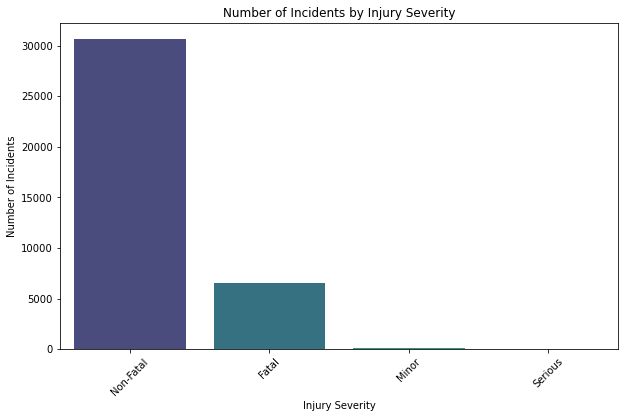

In [60]:
severity_counts = df['Injury_Severity'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=severity_counts.index, y=severity_counts.values, palette="viridis")
plt.title('Number of Incidents by Injury Severity')
plt.xlabel('Injury Severity')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

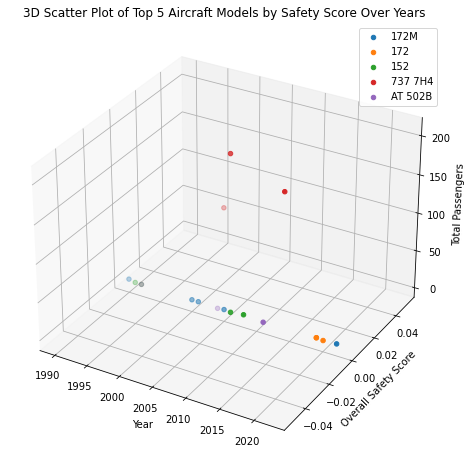

In [71]:
# Assuming your dataframe is named df
# Step 1: Identify the top 5 models by number of incidents
top_models = df_safe['Model'].value_counts().nlargest(5).index

# Step 2: Filter the dataframe to include only the top 5 models
filtered_df = df_safe[df_safe['Model'].isin(top_models)]

# Step 3: Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# We will loop over each model and plot them with different colors and markers
for model in top_models:
    model_data = filtered_df[filtered_df['Model'] == model]
    ax.scatter(model_data['Year'], model_data['Overall_Safety_Score'], zs=model_data['Total_Passengers'], label=model)

# Adding labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Overall Safety Score')
ax.set_zlabel('Total Passengers')
ax.set_title('3D Scatter Plot of Top 5 Aircraft Models by Safety Score Over Years')
ax.legend()

plt.show()

AttributeError: 'Poly3DCollection' object has no attribute '_edgecolors2d'

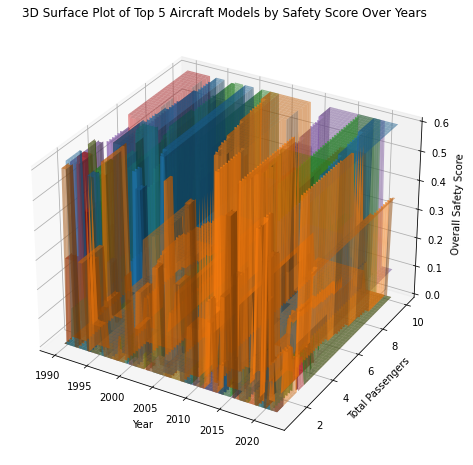

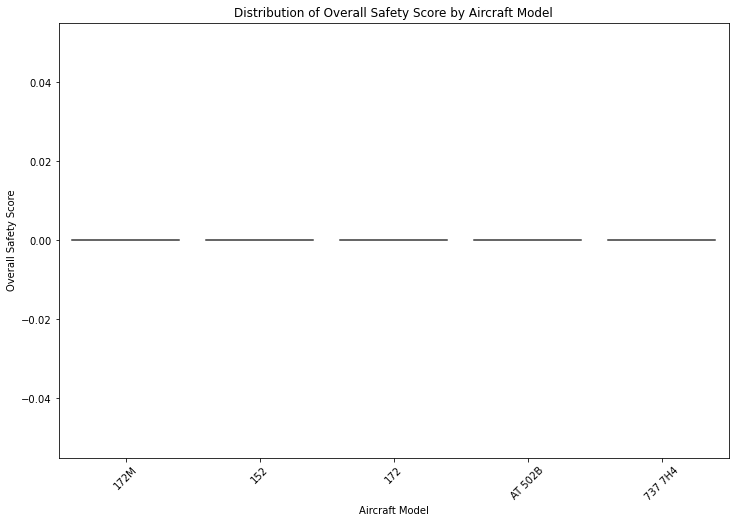

In [72]:
top_models = df_safe['Model'].value_counts().nlargest(5).index

# Step 2: Filter the dataframe to include only the top 5 models
filtered_df = df_safe[df_safe['Model'].isin(top_models)]

# Step 3: Create a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Model', y='Overall_Safety_Score', data=filtered_df, palette="viridis")

# Adding labels and title
plt.title('Distribution of Overall Safety Score by Aircraft Model')
plt.xlabel('Aircraft Model')
plt.ylabel('Overall Safety Score')
plt.xticks(rotation=45)
plt.show()

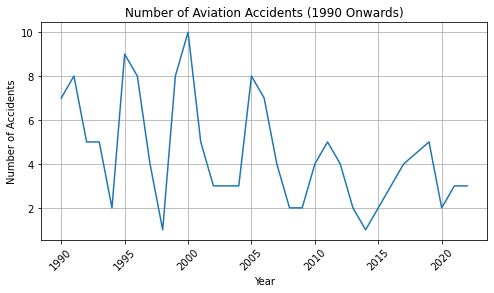

In [73]:
df = df_safe[df_safe['Year'] >= 1990]

accidents_by_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
plt.plot(accidents_by_year.index, accidents_by_year.values, linestyle='-')
plt.title('Number of Aviation Accidents (1990 Onwards)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()